In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)
sample_sub.columns = ["id","cover"]

exp11 = pd.read_csv(os.path.join(OUTPUT_DIR,"submit_lightgbm_seed42_ver11.csv"), header=None)
exp13 = pd.read_csv(os.path.join(OUTPUT_DIR,"submit_lightgbm_seed42_ver13.csv"), header=None)
exp11.columns = ["id","cover"]
exp13.columns = ["id","cover"]

In [3]:
sample_sub["cover"] = (exp11.cover + exp13.cover) / 2

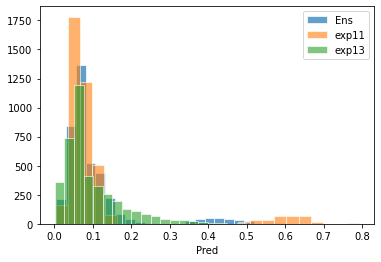

In [4]:
import matplotlib.pyplot as plt

plt.hist(sample_sub.cover, label="Ens", bins=25,edgecolor='white', alpha=.7)
plt.hist(exp11.cover, label="exp11", bins=25,edgecolor='white', alpha=.6)
plt.hist(exp13.cover, label="exp13", bins=25,edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [5]:
sample_sub[["cover"]].to_csv(os.path.join(OUTPUT_DIR, f'submit_Ensemble_exp11_exp13.csv'), header=False)